In [66]:
import pandas as pd
import urllib3
import requests
import numpy as np
import datetime
import requests
import re
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42

In [9]:
kyVax = pd.read_csv("county_level_vaccination_data_for_kentucky.csv")
ohVax = pd.read_csv("county_level_vaccination_data_for_ohio.csv")
wvVax = pd.read_csv("county_level_vaccination_data_for_west_virginia.csv")

In [10]:
kyVax = kyVax.rename(columns={'People Fully Vaccinated - Resident': 'Vaxed',
       'Percent of Total Pop Fully Vaccinated - Resident':'pctVaxed',
       'People 18+ Fully Vaccinated - Resident':'18PlusVaxed',
       'Percent of 18+ Pop Fully Vaccinated - Resident':'pct18PlusVaxed',
       'People 65+ Fully Vaccinated - Resident':"65PlusVaxed",
       'Percent of 65+ Pop Fully Vaccinated - Resident': 'pct65PlusVaxed'})

ohVax = ohVax.rename(columns={'People Fully Vaccinated - Resident': 'Vaxed',
       'Percent of Total Pop Fully Vaccinated - Resident':'pctVaxed',
       'People 18+ Fully Vaccinated - Resident':'18PlusVaxed',
       'Percent of 18+ Pop Fully Vaccinated - Resident':'pct18PlusVaxed',
       'People 65+ Fully Vaccinated - Resident':"65PlusVaxed",
       'Percent of 65+ Pop Fully Vaccinated - Resident': 'pct65PlusVaxed'})

wvVax = wvVax.rename(columns={'People Fully Vaccinated - Resident': 'Vaxed',
       'Percent of Total Pop Fully Vaccinated - Resident':'pctVaxed',
       'People 18+ Fully Vaccinated - Resident':'18PlusVaxed',
       'Percent of 18+ Pop Fully Vaccinated - Resident':'pct18PlusVaxed',
       'People 65+ Fully Vaccinated - Resident':"65PlusVaxed",
       'Percent of 65+ Pop Fully Vaccinated - Resident': 'pct65PlusVaxed'})

In [11]:
kyVax["county_name"]=kyVax['County']+" County" + ', KY'
ohVax["county_name"]=ohVax['County']+" County" + ', OH'
wvVax["county_name"]=wvVax['County']+" County" + ', WV'

wvVax=wvVax[wvVax["County"] != 'Unknown']
ohVax=ohVax[ohVax["County"] != 'Unknown']

In [12]:
merged_vaxed = pd.concat([kyVax, ohVax, wvVax])

In [13]:
fips_data = pd.read_csv("https://raw.githubusercontent.com/louisvillepublicmedia/fipsAndpopulationData/main/countiesFipscode.csv")

In [14]:
fips_data['county_name']=fips_data['Name'] + ' County'+', ' +fips_data['State'] 

In [15]:
fips_data=fips_data[['FIPS', 'county_name', 'State']]

In [16]:
vaxData = pd.merge(merged_vaxed, fips_data, on='county_name')

In [17]:
vaxData=vaxData[['County', 'State','FIPS','Vaxed', 'pctVaxed', '18PlusVaxed', 'pct18PlusVaxed',
       '65PlusVaxed', 'pct65PlusVaxed' ]]

In [18]:
vaxData.sort_values("pctVaxed").tail(10)

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
87,Morgan,KY,21175,3633,27.3,3624,33.1,1137,49.1
35,Floyd,KY,21071,9832,27.6,9805,35.3,3817,56.9
90,Nicholas,KY,21181,2029,27.9,2029,36.8,950,76.7
66,Letcher,KY,21133,6229,28.9,6209,36.8,2511,58.6
97,Pike,KY,21195,17159,29.6,17031,37.1,6425,57.1
96,Perry,KY,21193,7717,30.0,7707,38.8,3081,68.6
71,Lyon,KY,21143,2459,30.0,2458,35.0,1309,61.2
36,Franklin,KY,21073,15869,31.1,15858,39.2,7224,77.0
33,Fayette,KY,21067,102937,31.9,102636,40.1,31477,70.2
119,Woodford,KY,21239,9357,35.0,9339,44.7,3710,71.6


In [19]:
vaxData.sort_values("pctVaxed").head(10)

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
260,Wirt,WV,54105,27,0.5,27,0.6,25,2.1
240,Morgan,WV,54065,174,1.0,174,1.2,132,3.1
251,Roane,WV,54087,207,1.5,207,1.9,137,4.4
208,Barbour,WV,54001,251,1.5,251,1.9,174,5.1
216,Doddridge,WV,54017,130,1.5,130,1.8,80,4.3
253,Taylor,WV,54091,267,1.6,267,2.0,181,5.2
256,Upshur,WV,54097,753,3.1,752,3.9,523,10.3
242,Ohio,WV,54069,1373,3.3,1372,4.1,661,7.2
231,Marion,WV,54049,1942,3.5,1940,4.3,1212,10.9
244,Pleasants,WV,54073,301,4.0,301,5.0,212,14.5


In [135]:
vaxData.pctVaxed.median()

20.1

In [134]:
vaxData.groupby("State")['pctVaxed'].median()

State
KY    20.85
OH    20.70
WV    12.60
Name: pctVaxed, dtype: float64

In [22]:
vaxData[(vaxData.pctVaxed < 10)].count()/263

County            0.08365
State             0.08365
FIPS              0.08365
Vaxed             0.08365
pctVaxed          0.08365
18PlusVaxed       0.08365
pct18PlusVaxed    0.08365
65PlusVaxed       0.08365
pct65PlusVaxed    0.08365
dtype: float64

In [23]:
vaxData.pctVaxed.describe()

count    263.000000
mean      18.915209
std        5.821053
min        0.500000
25%       16.550000
50%       20.100000
75%       22.300000
max       35.000000
Name: pctVaxed, dtype: float64

In [24]:
vaxData.pct65PlusVaxed.describe()

count    263.000000
mean      50.947148
std       15.551907
min        2.100000
25%       45.100000
50%       55.100000
75%       61.850000
max       77.000000
Name: pct65PlusVaxed, dtype: float64

In [25]:
vaxData.pct65PlusVaxed.median()

55.1

In [26]:
vaxData.groupby("State")['pct65PlusVaxed'].median()

State
KY    53.20
OH    61.55
WV    31.20
Name: pct65PlusVaxed, dtype: float64

In [153]:
vaxData.sort_values('pct65PlusVaxed').head()

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
260,Wirt,WV,54105,27,0.5,27,0.6,25,2.1
240,Morgan,WV,54065,174,1.0,174,1.2,132,3.1
216,Doddridge,WV,54017,130,1.5,130,1.8,80,4.3
251,Roane,WV,54087,207,1.5,207,1.9,137,4.4
208,Barbour,WV,54001,251,1.5,251,1.9,174,5.1


In [175]:
vaxData[vaxData.State == 'OH'].sort_values("pctVaxed").head(40)

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
157,Holmes,OH,39075,3963,9.0,3960,13.0,2403,39.0
200,Van Wert,OH,39161,2727,9.6,2727,12.6,1275,23.2
120,Adams,OH,39001,3772,13.6,3771,17.9,2382,46.6
127,Brown,OH,39015,6541,15.1,6537,19.5,3973,49.9
122,Ashland,OH,39005,8199,15.3,8194,19.7,4759,46.5
194,Shelby,OH,39149,7921,16.3,7913,21.6,4602,55.6
155,Highland,OH,39071,7075,16.4,7073,21.5,4243,51.9
204,Wayne,OH,39169,19450,16.8,19427,22.1,11669,55.1
178,Morrow,OH,39117,5998,17.0,5995,21.9,3486,55.4
138,Darke,OH,39037,8781,17.2,8773,22.5,5672,55.7


In [154]:
vaxData[vaxData.State == 'WV'].sort_values("pctVaxed")

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
260,Wirt,WV,54105,27,0.5,27,0.6,25,2.1
240,Morgan,WV,54065,174,1.0,174,1.2,132,3.1
208,Barbour,WV,54001,251,1.5,251,1.9,174,5.1
251,Roane,WV,54087,207,1.5,207,1.9,137,4.4
216,Doddridge,WV,54017,130,1.5,130,1.8,80,4.3
253,Taylor,WV,54091,267,1.6,267,2.0,181,5.2
256,Upshur,WV,54097,753,3.1,752,3.9,523,10.3
242,Ohio,WV,54069,1373,3.3,1372,4.1,661,7.2
231,Marion,WV,54049,1942,3.5,1940,4.3,1212,10.9
244,Pleasants,WV,54073,301,4.0,301,5.0,212,14.5


In [169]:
vaxData[vaxData.State == 'KY'].sort_values("pctVaxed").head(50)

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
107,Spencer,KY,21215,2023,10.5,2021,13.5,836,29.7
23,Christian,KY,21047,7631,10.8,7627,14.8,4161,46.3
52,Hickman,KY,21105,582,13.3,582,16.3,393,34.0
3,Ballard,KY,21007,1049,13.3,1049,16.8,629,36.4
22,Casey,KY,21045,2173,13.4,2172,17.4,1200,36.4
67,Lewis,KY,21135,1801,13.6,1801,17.4,873,35.5
109,Todd,KY,21219,1733,14.1,1732,19.2,904,45.3
49,Hart,KY,21099,2723,14.3,2721,18.9,1448,45.4
101,Rockcastle,KY,21203,2417,14.5,2416,18.4,1151,36.7
19,Carlisle,KY,21039,713,15.0,712,19.4,483,47.0


In [160]:
vaxData.sort_values('pctVaxed').head(23)

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
260,Wirt,WV,54105,27,0.5,27,0.6,25,2.1
240,Morgan,WV,54065,174,1.0,174,1.2,132,3.1
251,Roane,WV,54087,207,1.5,207,1.9,137,4.4
208,Barbour,WV,54001,251,1.5,251,1.9,174,5.1
216,Doddridge,WV,54017,130,1.5,130,1.8,80,4.3
253,Taylor,WV,54091,267,1.6,267,2.0,181,5.2
256,Upshur,WV,54097,753,3.1,752,3.9,523,10.3
242,Ohio,WV,54069,1373,3.3,1372,4.1,661,7.2
231,Marion,WV,54049,1942,3.5,1940,4.3,1212,10.9
244,Pleasants,WV,54073,301,4.0,301,5.0,212,14.5


In [31]:
vaxData.sort_values('pctVaxed').tail(3)

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
36,Franklin,KY,21073,15869,31.1,15858,39.2,7224,77.0
33,Fayette,KY,21067,102937,31.9,102636,40.1,31477,70.2
119,Woodford,KY,21239,9357,35.0,9339,44.7,3710,71.6


,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
0,Adair,KY,21001,3160,16.5,3158,20.5,1502,40.6
1,Allen,KY,21003,4170,19.6,4166,25.4,1946,50.5
2,Anderson,KY,21005,5456,24.0,5450,31.3,2505,67.5
3,Ballard,KY,21007,1049,13.3,1049,16.8,629,36.4
4,Barren,KY,21009,8956,20.2,8955,26.4,4355,54.6
...,...,...,...,...,...,...,...,...,...
258,Webster,WV,54101,1677,20.7,1669,25.5,917,47.0
259,Wetzel,WV,54103,707,4.7,705,5.8,440,12.6
260,Wirt,WV,54105,27,0.5,27,0.6,25,2.1
261,Wood,WV,54107,13533,16.2,13526,20.5,8471,48.5


In [33]:
cases_df = pd.read_csv("county_cases_april_09.csv")

In [35]:
cases_df.head()

,county_name,fips_code,county_type,state_abbr,pop,pop_share_pct,cases,casesPer100k,deaths,deathsPer100k,pct_uninsured,pct_in_poverty,pct_above65,avg_household_size,pct_non_hispanic_black,pct_hispanic,pct_asian
0,"Cuyahoga County, OH",39035,Large central metro,OH,1235072,10.6,104290,8444,2029,164,6,18,19,2.3,30,6,3
1,"Franklin County, OH",39049,Large central metro,OH,1316756,11.3,119897,9105,1339,102,8,16,12,2.5,23,6,6
2,"Summit County, OH",39153,Medium metro,OH,541013,4.6,44226,8175,904,167,6,13,18,2.4,15,2,4
3,"Lucas County, OH",39095,Medium metro,OH,428348,3.7,38790,9056,752,176,6,19,17,2.4,20,7,2
4,"Hamilton County, OH",39061,Large central metro,OH,817473,7.0,77213,9445,1160,142,6,16,16,2.3,26,4,3


In [36]:
merged_df = pd.merge(vaxData, cases_df, left_on='FIPS', right_on='fips_code')

In [41]:
merged_df=merged_df[['County', 'State', 'fips_code', 
       'county_type', 'pop', 'pop_share_pct',
       'cases', 'casesPer100k', 'deaths', 'deathsPer100k','Vaxed', 'pctVaxed', 
       'pct18PlusVaxed', 'pct65PlusVaxed', 'pct_uninsured',
       'pct_in_poverty', 'pct_above65', 'avg_household_size',
       'pct_non_hispanic_black', 'pct_hispanic', 'pct_asian']]

In [90]:
merged_df['deathsPer100k']= merged_df.deathsPer100k.str.replace('-', '0')

<ipython-input-90-3fa3ba8592f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['deathsPer100k']= merged_df.deathsPer100k.str.replace('-', '0')


In [110]:
merged_df['deathsPer100k']=merged_df['deathsPer100k'].astype(float)

<ipython-input-110-3d7352298030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['deathsPer100k']=merged_df['deathsPer100k'].astype(float)


In [91]:
merged_df.county_type.value_counts()

Non-core               102
Micropolitan            67
Large fringe metro      31
Small metro             30
Medium metro            29
Large central metro      4
Name: county_type, dtype: int64

In [92]:
merged_df.groupby('county_type').pctVaxed.mean()

county_type
Large central metro    21.675000
Large fringe metro     19.758065
Medium metro           20.648276
Micropolitan           19.032836
Non-core               18.623529
Small metro            16.730000
Name: pctVaxed, dtype: float64

In [93]:
merged_df.groupby('county_type').Vaxed.sum()*100/merged_df.groupby('county_type').pop.sum()

county_type
Large central metro    21.396388
Large fringe metro     20.730329
Medium metro           21.753781
Micropolitan           19.624562
Non-core               19.006242
Small metro            18.053733
dtype: float64

In [94]:
merged_df.groupby(['State','county_type']).Vaxed.sum()*100/merged_df.groupby(['State','county_type']).pop.sum()

State  county_type        
KY     Large central metro    23.464279
       Large fringe metro     20.626450
       Medium metro           25.883510
       Micropolitan           20.608081
       Non-core               21.544049
       Small metro            21.323971
OH     Large central metro    20.925794
       Large fringe metro     20.951318
       Medium metro           21.792838
       Micropolitan           20.250280
       Non-core               19.093355
       Small metro            21.659499
WV     Large fringe metro     12.373569
       Medium metro           12.197864
       Micropolitan           12.721975
       Non-core               12.568265
       Small metro            13.575402
dtype: float64

In [95]:
merged_df.groupby(['State']).county_type.value_counts()

State  county_type        
KY     Non-core               59
       Micropolitan           26
       Large fringe metro     13
       Medium metro           11
       Small metro            10
       Large central metro     1
OH     Micropolitan           33
       Large fringe metro     17
       Non-core               17
       Medium metro           13
       Small metro             5
       Large central metro     3
WV     Non-core               26
       Small metro            15
       Micropolitan            8
       Medium metro            5
       Large fringe metro      1
Name: county_type, dtype: int64

In [96]:
merged_df.head()

,County,State,fips_code,county_type,pop,pop_share_pct,cases,casesPer100k,deaths,deathsPer100k,...,pct18PlusVaxed,pct65PlusVaxed,pct_uninsured,pct_in_poverty,pct_above65,avg_household_size,pct_non_hispanic_black,pct_hispanic,pct_asian,vaxedPer100k
0,Adair,KY,21001,Non-core,19202,0.4,1799,9369,53,276,...,20.5,40.6,7,22,19,2.6,3,2,0,16457.0
1,Allen,KY,21003,Small metro,21315,0.5,1977,9275,35,164,...,25.4,50.5,8,19,18,2.7,1,2,0,19564.0
2,Anderson,KY,21005,Micropolitan,22747,0.5,1686,7412,19,84,...,31.3,67.5,4,14,16,2.6,2,2,1,23986.0
3,Ballard,KY,21007,Micropolitan,7888,0.2,384,4868,8,101,...,16.8,36.4,10,17,22,2.6,3,1,1,13299.0
4,Barren,KY,21009,Micropolitan,44249,1.0,4295,9706,86,194,...,26.4,54.6,8,24,18,2.5,4,3,1,20240.0


In [97]:
merged_df['vaxedPer100k']=(merged_df['Vaxed']*100000/merged_df['pop']).round()

<ipython-input-97-a3597525ce46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['vaxedPer100k']=(merged_df['Vaxed']*100000/merged_df['pop']).round()


In [98]:
merged_df.head()

,County,State,fips_code,county_type,pop,pop_share_pct,cases,casesPer100k,deaths,deathsPer100k,...,pct18PlusVaxed,pct65PlusVaxed,pct_uninsured,pct_in_poverty,pct_above65,avg_household_size,pct_non_hispanic_black,pct_hispanic,pct_asian,vaxedPer100k
0,Adair,KY,21001,Non-core,19202,0.4,1799,9369,53,276,...,20.5,40.6,7,22,19,2.6,3,2,0,16457.0
1,Allen,KY,21003,Small metro,21315,0.5,1977,9275,35,164,...,25.4,50.5,8,19,18,2.7,1,2,0,19564.0
2,Anderson,KY,21005,Micropolitan,22747,0.5,1686,7412,19,84,...,31.3,67.5,4,14,16,2.6,2,2,1,23986.0
3,Ballard,KY,21007,Micropolitan,7888,0.2,384,4868,8,101,...,16.8,36.4,10,17,22,2.6,3,1,1,13299.0
4,Barren,KY,21009,Micropolitan,44249,1.0,4295,9706,86,194,...,26.4,54.6,8,24,18,2.5,4,3,1,20240.0


No handles with labels found to put in legend.


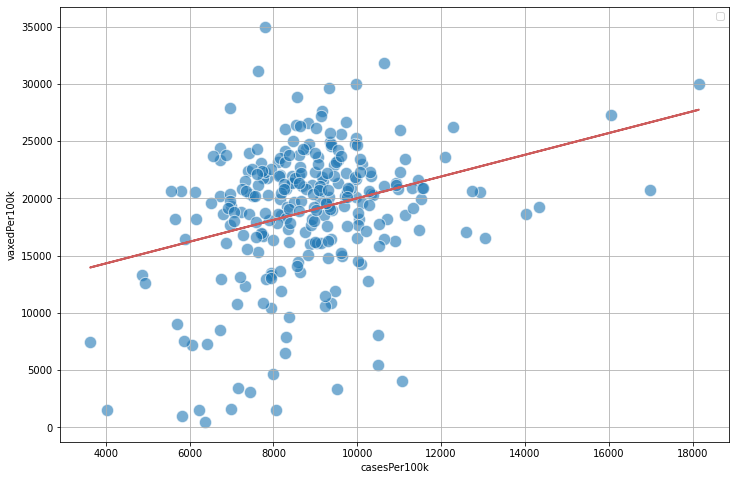

In [99]:

#setting variables
x = merged_df[['casesPer100k']].values.astype(int)
y = merged_df[['vaxedPer100k']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('casesPer100k')
plt.ylabel('vaxedPer100k')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='casesPer100k', y="vaxedPer100k", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()
# plt.savefig("biden_vote_increase3.svg", format="svg")

No handles with labels found to put in legend.


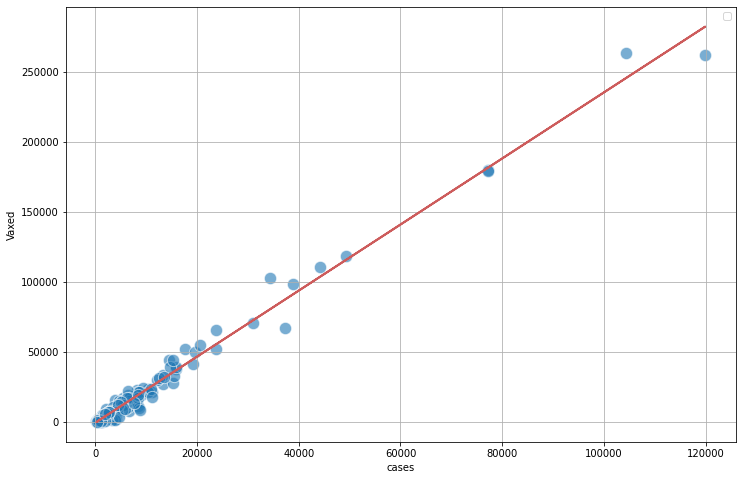

In [132]:

#setting variables
x = merged_df[['cases']].values
y = merged_df[['Vaxed']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('cases')
plt.ylabel('Vaxed')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='cases', y="Vaxed", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()
# plt.savefig("biden_vote_increase3.svg", format="svg")

No handles with labels found to put in legend.


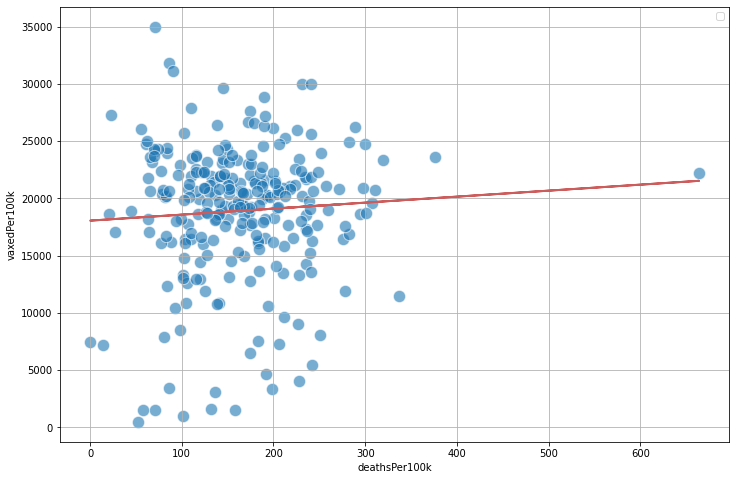

In [111]:

#setting variables
x = merged_df[['deathsPer100k']].values
y = merged_df[['vaxedPer100k']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('deathsPer100k')
plt.ylabel('vaxedPer100k')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='deathsPer100k', y="vaxedPer100k", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()

No handles with labels found to put in legend.


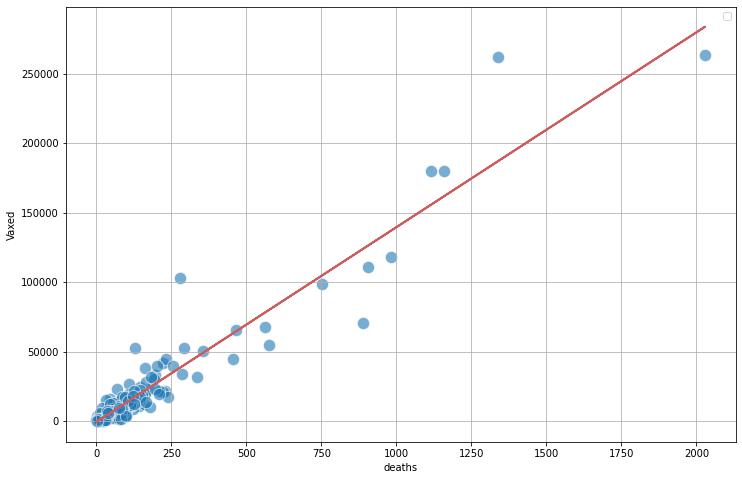

In [116]:

#setting variables
x = merged_df[['deaths']].values
y = merged_df[['Vaxed']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('deaths')
plt.ylabel('Vaxed')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='deaths', y="Vaxed", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()

No handles with labels found to put in legend.


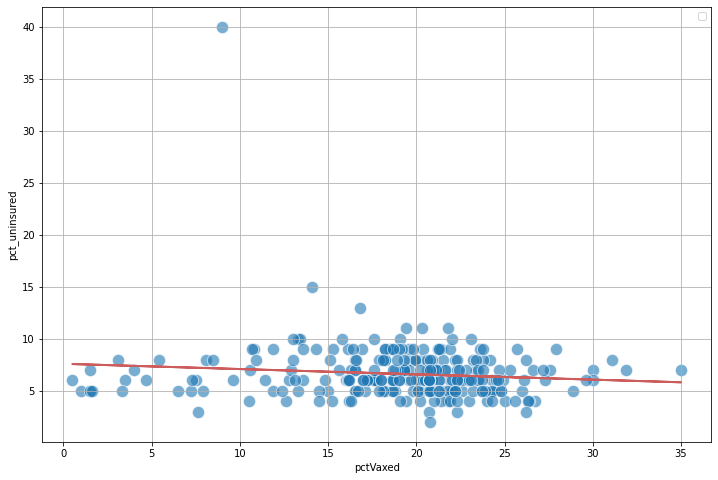

In [119]:

#setting variables
x = merged_df[['pctVaxed']].values
y = merged_df[['pct_uninsured']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('pctVaxed')
plt.ylabel('pct_uninsured')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='pctVaxed', y="pct_uninsured", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()

In [122]:
merged_df[merged_df['pct_uninsured'] > 20]

,County,State,fips_code,county_type,pop,pop_share_pct,cases,casesPer100k,deaths,deathsPer100k,...,pct18PlusVaxed,pct65PlusVaxed,pct_uninsured,pct_in_poverty,pct_above65,avg_household_size,pct_non_hispanic_black,pct_hispanic,pct_asian,vaxedPer100k
157,Holmes,OH,39075,Non-core,43960,0.4,2502,5692,100,227.0,...,13.0,39.0,40,11,14,3.5,0,1,0,9015.0


No handles with labels found to put in legend.


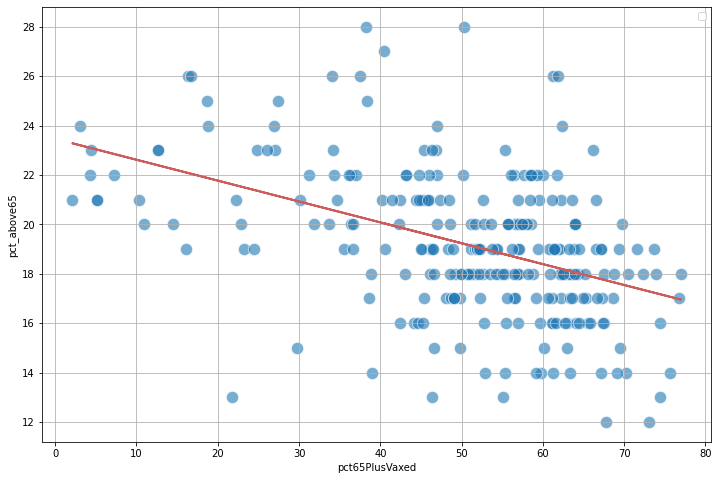

In [124]:
#setting variables
x = merged_df[['pct65PlusVaxed']].values
y = merged_df[['pct_above65']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('pct65PlusVaxed')
plt.ylabel('pct_above65')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='pct65PlusVaxed', y="pct_above65", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()

No handles with labels found to put in legend.


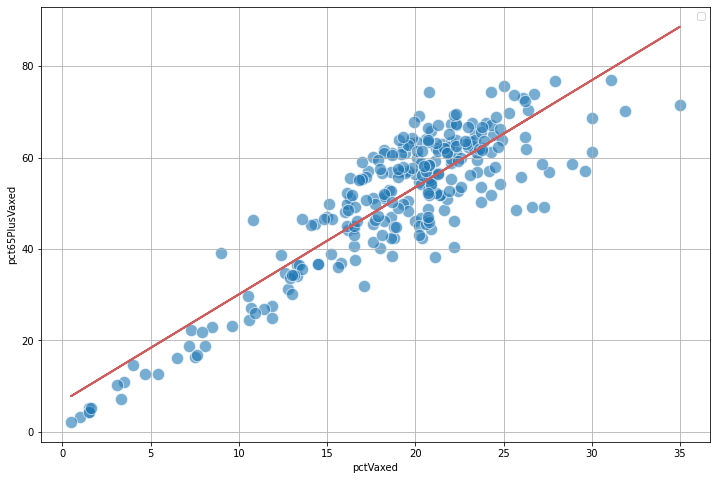

In [126]:
#setting variables
x = merged_df[['pctVaxed']].values
y = merged_df[['pct65PlusVaxed']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('pctVaxed')
plt.ylabel('pct65PlusVaxed')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='pctVaxed', y="pct65PlusVaxed", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()

In [133]:
merged_df

,County,State,fips_code,county_type,pop,pop_share_pct,cases,casesPer100k,deaths,deathsPer100k,...,pct18PlusVaxed,pct65PlusVaxed,pct_uninsured,pct_in_poverty,pct_above65,avg_household_size,pct_non_hispanic_black,pct_hispanic,pct_asian,vaxedPer100k
0,Adair,KY,21001,Non-core,19202,0.4,1799,9369,53,276.0,...,20.5,40.6,7,22,19,2.6,3,2,0,16457.0
1,Allen,KY,21003,Small metro,21315,0.5,1977,9275,35,164.0,...,25.4,50.5,8,19,18,2.7,1,2,0,19564.0
2,Anderson,KY,21005,Micropolitan,22747,0.5,1686,7412,19,84.0,...,31.3,67.5,4,14,16,2.6,2,2,1,23986.0
3,Ballard,KY,21007,Micropolitan,7888,0.2,384,4868,8,101.0,...,16.8,36.4,10,17,22,2.6,3,1,1,13299.0
4,Barren,KY,21009,Micropolitan,44249,1.0,4295,9706,86,194.0,...,26.4,54.6,8,24,18,2.5,4,3,1,20240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Webster,WV,54101,Non-core,8114,0.5,451,5558,7,86.0,...,25.5,47.0,6,28,24,2.2,0,1,0,20668.0
259,Wetzel,WV,54103,Non-core,15065,0.8,1202,7979,29,192.0,...,5.8,12.6,6,23,23,2.6,0,1,0,4693.0
260,Wirt,WV,54105,Small metro,5821,0.3,371,6373,3,52.0,...,0.6,2.1,6,19,21,2.3,0,1,0,464.0
261,Wood,WV,54107,Small metro,83518,4.7,7505,8986,166,199.0,...,20.5,48.5,6,17,21,2.4,1,1,1,16204.0


No handles with labels found to put in legend.


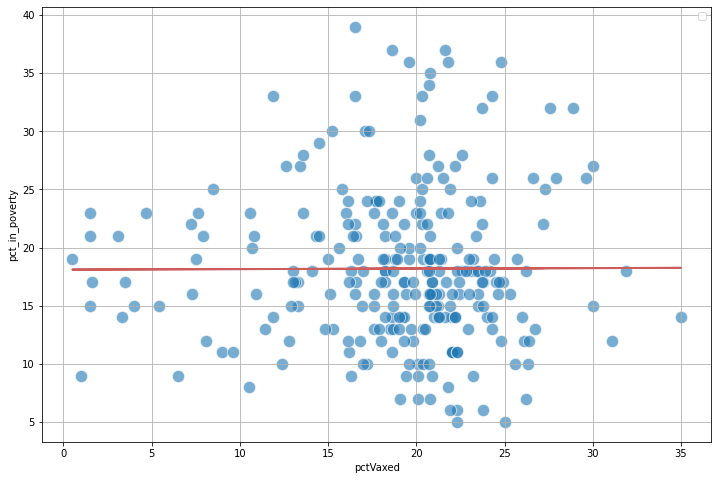

In [138]:
#setting variables
x = merged_df[['pctVaxed']].values
y = merged_df[['pct_in_poverty']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('pctVaxed')
plt.ylabel('pct_in_poverty')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='pctVaxed', y="pct_in_poverty", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()

In [145]:
merged_df[['County', 'State', 'pctVaxed', 'casesPer100k']].sort_values('casesPer100k')

,County,State,pctVaxed,casesPer100k
214,Calhoun,WV,7.5,3629
251,Roane,WV,1.5,4025
3,Ballard,KY,13.3,4868
215,Clay,WV,12.6,4937
258,Webster,WV,20.7,5558
...,...,...,...,...
26,Clinton,KY,18.6,14034
184,Pickaway,OH,19.3,14337
87,Morgan,KY,27.3,16057
64,Lee,KY,20.7,16993


In [162]:
vaxData[vaxData.County == 'Berkeley']

,County,State,FIPS,Vaxed,pctVaxed,18PlusVaxed,pct18PlusVaxed,65PlusVaxed,pct65PlusVaxed
209,Berkeley,WV,54003,17659,14.8,17638,19.2,8357,46.6


In [164]:
vaxData[vaxData.State == 'WV'].pctVaxed.mean()

12.283636363636367

No handles with labels found to put in legend.


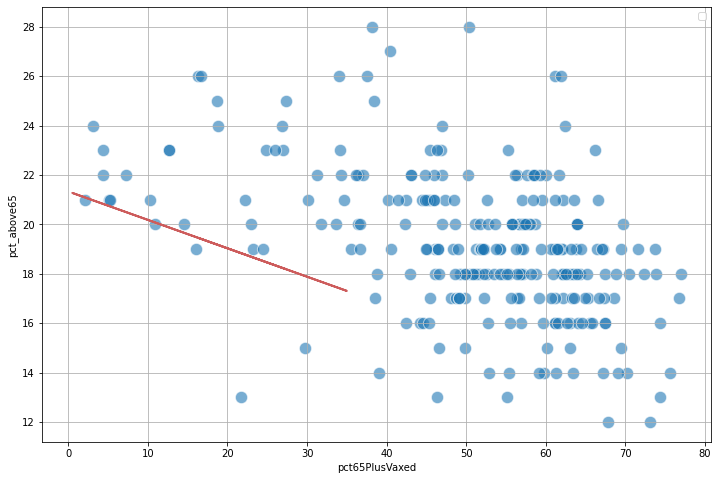

In [176]:
#setting variables
x = merged_df[['pctVaxed']].values
y = merged_df[['pct_above65']].values

### init the regression
my_regression = LinearRegression()

#     ### fit our variables into it
my_regression.fit(x,y)
plt.figure(figsize=(12,8))


#     # fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('pct65PlusVaxed')
plt.ylabel('pct_above65')

### make the scatter in Blue
# plt.scatter(x,y,alpha=0.6, s=100)
g= sns.scatterplot(x='pct65PlusVaxed', y="pct_above65", 
#                    hue="county_type",
          data=merged_df,
#                 palette=['#FFD700',"#FF4500","#ffa500",'#ffdab9'],
                marker='o',
                alpha=0.6, s=150, legend='full')

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# g.set(ylim = (0,1300000))
plt.grid()

plt.legend()

In [178]:
merged_df[["pctVaxed", 'County', 'pct_above65']].to_csv("vaxedVspop.csv", index=False)